# Project: Wrangling and Analyze Data

**Written by** 

*Haifaa Mohamad Alzahrani*

In [5]:
import pandas as pd
import numpy as np
import requests as req
import json
# import tweepy 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [6]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [10]:
# Download image-prediction via Requests library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
res = req.get(url)

In [11]:
# Save image-predictions file
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(res.content)
    
# Read TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep = '\t')

image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [12]:
# # I could not get an access to Twitter API. However, here is the segment of code needed to get tweets data.
# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df_1.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [13]:
# Read tweets response file into a pandas DataFrame
json_list = []
with open('tweet-json.txt', 'r') as file:
    tweets = file.readlines()
    for tweet in tweets:
        parsed_json = json.loads(tweet)
        # The required: tweet ID, retweet count, and favorite count.
        json_list.append({'Tweet_id': parsed_json['id'],
                        'Retweet_count': parsed_json['retweet_count'],
                        'Favorite_count': parsed_json['favorite_count']})
        
tweet_json = pd.DataFrame(json_list, columns = ['Tweet_id', 'Retweet_count', 'Favorite_count'])

tweet_json.head()

,Tweet_id,Retweet_count,Favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



Here, each dataframe will be assessed visually and programmatically separately. The objective is to assess the data quality and tidness. To be more specific, quality of data means: completeness, validity, accuracy, and consistency. And the tideness means:
* Each variable forms a column
* Each observation forms a row
* Each type of observational unit forms a table


**1) twitter_archive**

In [14]:
# To assess visually 
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [15]:
# To assess programatocally
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
# Since there is no need to clean the rating_numerator, I'll check the denominator
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [17]:
# To check min & max of rating_numerator & rating_denominator
# Other data is not real numbers i.e. ID so no need to check them
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
# Check if there are duplicated rows
twitter_archive.duplicated().sum()

0

In [19]:
# Check if there are duplicated tweets
twitter_archive.tweet_id.duplicated().sum()

0

From visually assessing previously, I noticed an issue with the source, so I will check its values.

In [20]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

**2) image_prediction**

In [21]:
# To assess visually 
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [22]:
# To assess programatocally
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
# To check statistics of p1_conf, p2_conf, p3_conf, and img_num
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [24]:
# Check if there are duplicated rows
image_prediction.duplicated().sum()

0

In [25]:
# Check if there are duplicated predictions which are based on image
image_prediction.jpg_url.duplicated().sum()

66

**3) tweet_json**

In [26]:
# To assess visually 
tweet_json

,Tweet_id,Retweet_count,Favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [27]:
# To assess programatocally
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Tweet_id        2354 non-null   int64
 1   Retweet_count   2354 non-null   int64
 2   Favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [28]:
# To check statistics of Retweet_count, Favorite_count
tweet_json.describe()

,Tweet_id,Retweet_count,Favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [29]:
# Check if there are duplicated rows
tweet_json.duplicated().sum()

0

In [30]:
# Check if there are duplicated predictions which are based on tweet id
tweet_json.Tweet_id.duplicated().sum()

0

### Note
Before starting the cleaning, I would like to clarify the issues based on its importance. This will illimnate the data from begining and then calculations. 

### Quality issues

**twitter_archive**
1. No need for all observations, we can exclude retweet data and in reply data.

2. No need for in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp. 

3. Data type of timestamp must be datetime. 

4. The rating_denominator must be 10, no need for different values.

5. Source of images should be direct link or label such as "Twitter for iPhone", not an HTML element for more readability.

**image_prediction**

6. No need for all attribues, we only need the highest prediction.

7. 66 images are duplicated. 

8. The predictions are not always for dogs, e.g. orange & paper_towel.

**tweet_json**

10. Number of observations is different than what is included in twitter_archive.

**Generally** 

11. The dataframes have inconsistent headers names, so I'll rename them after creating the final **twitter_archive_master**.

### Tidiness issues
**twitter_archive**

12. doggo, floofer, pupper, puppo are all stages of dog, should be in one column.

**Generally**

13. There are 3 tables, with different attributes but they refer to the same observational unit or tweets. So, we need to join them in order to make one tidy table.
This will be done by filtering data based on tweet_id to keep only the tweets that match with twitter_archive. Moreover, the attributes must be filtered to use only the relevant data. Thus, each observation will form a row, and each type of observational unit forms a table (this is a result of solving this issue and the previous one)


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [31]:
# Make copies of original pieces of data
twitter_archive_v1 = twitter_archive.copy()
image_prediction_v1 = image_prediction.copy()
tweet_json_v1 = tweet_json.copy()

### Issue #1

#### Define
No need for all observations, we can exclude retweet data and in reply data from **twitter_archive**.

#### Code

In [32]:
# Drop retweets 
twitter_archive = twitter_archive[twitter_archive.retweeted_status_user_id.isnull()]
# Drop reply 
twitter_archive = twitter_archive[twitter_archive.in_reply_to_user_id.isnull()]

#### Test

In [33]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

### Issue #2:

#### Define
No need for in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, or retweeted_status_timestamp in **twitter_archive**. 

#### Code

In [34]:
# Drop unwanted columns
twitter_archive = twitter_archive.drop(['in_reply_to_status_id', 
                            'in_reply_to_user_id',
                            'retweeted_status_id',
                            'retweeted_status_user_id',
                            'retweeted_status_timestamp'],axis=1)

#### Test

In [35]:
twitter_archive.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Issue #3:

#### Define
Data type of timestamp in **twitter_archive** must be datetime. But timestamp comes in the format of: 2017-08-01 16:23:56 +0000. The last part "+0000" refers to [timezone offset](https://stackoverflow.com/questions/31148689/what-is-the-0000-that-is-at-the-end-of-unix-posix-timestamp). In fact we dont need it, so we will remove it before starting conversion process.

#### Code

In [36]:
#Ommit timezone offset
twitter_archive['timestamp'] = twitter_archive['timestamp'].str.slice(start=0, stop=-6)

In [37]:
# Convert timestamp into datetime
twitter_archive['timestamp'] = pd.to_datetime(twitter_archive['timestamp'])

#### Test

In [38]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   int64         
 1   timestamp           2097 non-null   datetime64[ns]
 2   source              2097 non-null   object        
 3   text                2097 non-null   object        
 4   expanded_urls       2094 non-null   object        
 5   rating_numerator    2097 non-null   int64         
 6   rating_denominator  2097 non-null   int64         
 7   name                2097 non-null   object        
 8   doggo               2097 non-null   object        
 9   floofer             2097 non-null   object        
 10  pupper              2097 non-null   object        
 11  puppo               2097 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 213.0+ KB


### Issue #4

#### Define
The rating_denominator in in **twitter_archive** must be 10, no need for different values. I decided to drop them  instead of replace them with 10.

#### Code

In [39]:
twitter_archive = twitter_archive[twitter_archive.rating_denominator == 10]

#### Test

In [40]:
twitter_archive.rating_denominator.value_counts()

10    2080
Name: rating_denominator, dtype: int64

### Issue #5

#### Define
Source of images in **twitter_archive** should be direct link or label such as "Twitter for iPhone", not an HTML element for more readability.

#### Code

In [41]:
encoding_source = {"source": {"<a href=\"http://twitter.com/download/iphone\" rel=\"nofollow\">Twitter for iPhone</a>": "Twitter for iPhone",
                              "<a href=\"http://vine.co\" rel=\"nofollow\">Vine - Make a Scene</a>": "Vine",
                              "<a href=\"http://twitter.com\" rel=\"nofollow\">Twitter Web Client</a>": "Twitter Web Client",
                              "<a href=\"https://about.twitter.com/products/tweetdeck\" rel=\"nofollow\">TweetDeck</a>": "TweetDeck"
                              }}

In [42]:
twitter_archive = twitter_archive.replace(encoding_source)

#### Test

In [43]:
twitter_archive.source.value_counts()

Twitter for iPhone    1947
Vine                    91
Twitter Web Client      31
TweetDeck               11
Name: source, dtype: int64

### Issue #6

#### Define
No need for all attribues of **image_prediction**, we only need the highest prediction.

#### Code

In [44]:
image_prediction = image_prediction.drop(["p2",	"p2_conf", "p2_dog",
                                          "p3",	"p3_conf", "p3_dog"], axis=1)

#### Test

In [45]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True


### Issue #7

#### Define
66 images are duplicated in **image_prediction**. 

#### Code

In [46]:
image_prediction = image_prediction.drop_duplicates(subset='jpg_url', keep='first')

#### Test

In [47]:
image_prediction.jpg_url.duplicated().sum()

0

### Issue #8

#### Define
In **image_prediction**, the predictions are not always for dogs, e.g. orange & paper_towel.

#### Code

In [48]:
image_prediction = image_prediction[image_prediction.p1_dog == True]

#### Test

In [49]:
image_prediction.p1_dog.value_counts()

True    1480
Name: p1_dog, dtype: int64

In [50]:
# Now, there is no need for p1_dog anymore
image_prediction = image_prediction.drop(['p1_dog'],axis=1)

### Issue #9

#### Define
Number of observations in **tweet_json** differes than what is included in **twitter_archive**. So, I'll keep only the common observations between them.

#### Code

In [51]:
tweet_json.shape

(2354, 3)

In [52]:
twitter_archive.shape

(2080, 12)

In [53]:
tweet_ids = twitter_archive["tweet_id"]

In [54]:
# Keep only common observations
tweet_json = tweet_json.loc[tweet_json['Tweet_id'].isin(tweet_ids)]

#### Test

In [55]:
tweet_json.shape

(2080, 3)

## Tidiness issues

### Issue #12

#### Define
In **twitter_archive**, doggo, floofer, pupper, puppo are all stages of dog, should be in one column.

#### Code

In [56]:
# Melt stage columns to type and dog_stage columns
# Solution 1 was not accurate and does not cover all cases
# twitter_archive = pd.melt(twitter_archive, 
#                 id_vars = ['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'],
#                 value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], 
#                 var_name = 'dog_type', 
#                 value_name = 'dog_stage')

# # Drop type column 
# twitter_archive.drop('dog_type', 1, inplace = True)

# # Sort by dog_stage and drop duplicates
# twitter_archive = twitter_archive.sort_values('dog_stage').drop_duplicates(subset='tweet_id', keep='last')

In [57]:
# Solution 2, proposed by reviewr 
# First replace None in stage columns with an empty string as follows.
# Like this do replacements for all four stages, Then combine stage columns.
twitter_archive.doggo.replace('None', '', inplace=True)  
twitter_archive.floofer.replace('None', '', inplace=True)  
twitter_archive.pupper.replace('None', '', inplace=True)  
twitter_archive.puppo.replace('None', '', inplace=True)  
twitter_archive['stage'] = twitter_archive.doggo + twitter_archive.floofer + twitter_archive.pupper + twitter_archive.puppo
# Then format  with multiple dog stages which appeared like doggopupper.
twitter_archive.loc[twitter_archive.stage == 'doggopupper', 'stage'] = 'doggo,pupper' 
twitter_archive.loc[twitter_archive.stage == 'doggopuppo', 'stage'] = 'doggo,puppo' 
twitter_archive.loc[twitter_archive.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

In [58]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2080 non-null   int64         
 1   timestamp           2080 non-null   datetime64[ns]
 2   source              2080 non-null   object        
 3   text                2080 non-null   object        
 4   expanded_urls       2077 non-null   object        
 5   rating_numerator    2080 non-null   int64         
 6   rating_denominator  2080 non-null   int64         
 7   name                2080 non-null   object        
 8   doggo               2080 non-null   object        
 9   floofer             2080 non-null   object        
 10  pupper              2080 non-null   object        
 11  puppo               2080 non-null   object        
 12  stage               2080 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(9)
memory

In [59]:
import numpy as np
twitter_archive.stage.replace({'': np.nan}, inplace=True)

#### Test

In [60]:
twitter_archive.stage.value_counts()

pupper           221
doggo             72
puppo             23
floofer            9
doggo,pupper       9
doggo,puppo        1
doggo,floofer      1
Name: stage, dtype: int64

In [61]:
twitter_archive.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,,NaN


### Issue #13

#### Define
**Generally**, There are 3 tables, with different attributes but they refer to the same observational unit or tweets. So, we need to join them in order to make one tidy table. This will be done by filtering data based on tweet_id to keep only the tweets that match with twitter_archive. Moreover, the attributes must be filtered to use only the relevant data. Thus, each observation will form a row, and each type of observational unit forms a table (this is a result of solving this issue and the previous one)


#### Code

In [62]:
# Merging image_prediction with twitter_archive into twitter_archive_master
twitter_archive_master = twitter_archive.merge(image_prediction, on="tweet_id", how="inner")

#### Test

In [63]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1449 entries, 0 to 1448
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1449 non-null   int64         
 1   timestamp           1449 non-null   datetime64[ns]
 2   source              1449 non-null   object        
 3   text                1449 non-null   object        
 4   expanded_urls       1449 non-null   object        
 5   rating_numerator    1449 non-null   int64         
 6   rating_denominator  1449 non-null   int64         
 7   name                1449 non-null   object        
 8   doggo               1449 non-null   object        
 9   floofer             1449 non-null   object        
 10  pupper              1449 non-null   object        
 11  puppo               1449 non-null   object        
 12  stage               227 non-null    object        
 13  jpg_url             1449 non-null   object      

#### Code

In [64]:
twitter_archive_master.rename(columns={"tweet_id": "Tweet_id"}, inplace=True)

In [65]:
# Merging image_prediction with twitter_archive into twitter_archive_master
twitter_archive_master = twitter_archive_master.merge(tweet_json, on="Tweet_id", how="inner")

#### Test

In [66]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1449 entries, 0 to 1448
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Tweet_id            1449 non-null   int64         
 1   timestamp           1449 non-null   datetime64[ns]
 2   source              1449 non-null   object        
 3   text                1449 non-null   object        
 4   expanded_urls       1449 non-null   object        
 5   rating_numerator    1449 non-null   int64         
 6   rating_denominator  1449 non-null   int64         
 7   name                1449 non-null   object        
 8   doggo               1449 non-null   object        
 9   floofer             1449 non-null   object        
 10  pupper              1449 non-null   object        
 11  puppo               1449 non-null   object        
 12  stage               227 non-null    object        
 13  jpg_url             1449 non-null   object      

### Issue #11

#### Define
The resulted dataframe **twitter_archive_master** has inconsistnt headers names, so I'll rename them.

#### Code

In [67]:
twitter_archive_master.head()

,Tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage,jpg_url,img_num,p1,p1_conf,Retweet_count,Favorite_count
0,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,6514,33819
1,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,4328,25461
2,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,9774,41048
3,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,,,,,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,3261,20562
4,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,,,,,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,2158,12041


In [68]:
twitter_archive_master.rename(
    columns={"timestamp": "Timestamp", 
             "source": "Source", 
             "text": "Text",
             "expanded_urls": "Expanded_urls", 
             "rating_numerator": "Rating_numerator",
             "rating_denominator": "Rating_denominator", 
             "name": "Name",
             "dog_stage": "Dog_stage", 
             "jpg_url": "JPG_url",
             "img_num": "Img_num", 
             "p1": "Dog_breed",
             "p1_conf": "P1_conf"
            },
    inplace=True)

#### Test

In [69]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1449 entries, 0 to 1448
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Tweet_id            1449 non-null   int64         
 1   Timestamp           1449 non-null   datetime64[ns]
 2   Source              1449 non-null   object        
 3   Text                1449 non-null   object        
 4   Expanded_urls       1449 non-null   object        
 5   Rating_numerator    1449 non-null   int64         
 6   Rating_denominator  1449 non-null   int64         
 7   Name                1449 non-null   object        
 8   doggo               1449 non-null   object        
 9   floofer             1449 non-null   object        
 10  pupper              1449 non-null   object        
 11  puppo               1449 non-null   object        
 12  stage               227 non-null    object        
 13  JPG_url             1449 non-null   object      

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [70]:
twitter_archive_master.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [71]:
# This function is used to setup all charts' details such as title and labels
def drawChart(title, xlabelText, ylabelText, xticksRotate ):
    plt.title(title)
    # plt.grid(zorder=0)
    plt.xticks(rotation=xticksRotate)
    plt.xlabel(xlabelText)
    plt.ylabel(ylabelText)
    plt.show()

### Insights

#### Visualization 1

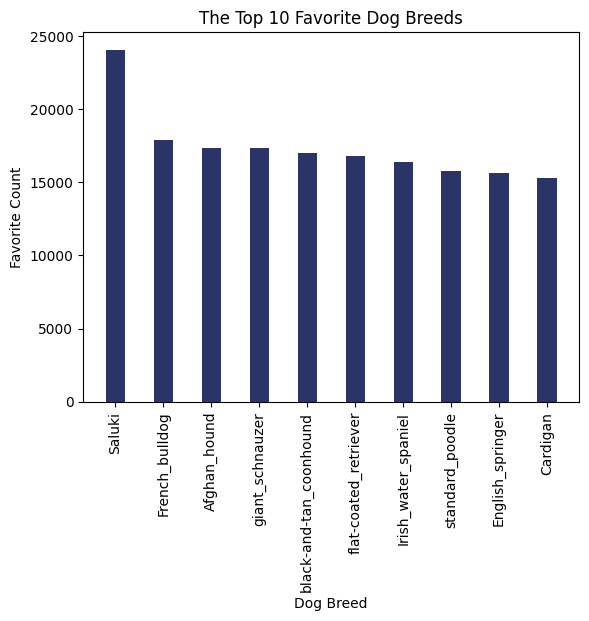

In [72]:
# Visualize favorite dog breeds
favorite_dog_breed = twitter_archive_master.groupby('Dog_breed').Favorite_count.mean().nlargest(10)
plt.bar(pd.Series(favorite_dog_breed.index),favorite_dog_breed.values, 
        width = 0.4, color="#2B3467", zorder=3)
drawChart( "The Top 10 Favorite Dog Breeds", "Dog Breed", "Favorite Count", 90)

#### Insight 1
The most favorite dog breeds are Saluki followed by French Bulldog. 

#### Visualization 2

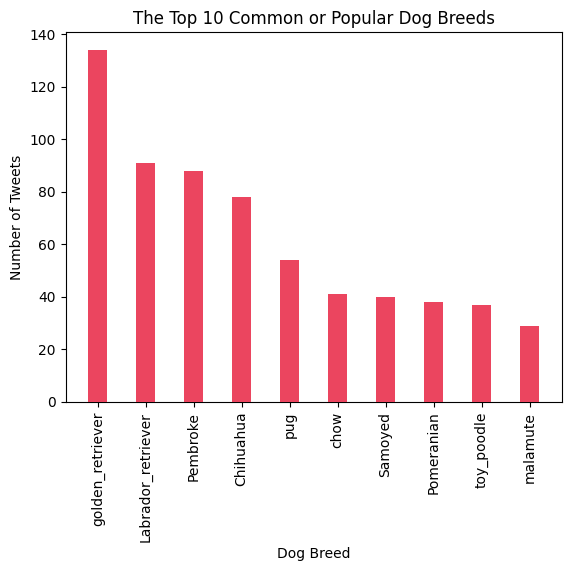

In [73]:
# Visualize popular dog breeds
popular_dog_breed = twitter_archive_master['Dog_breed'].value_counts().nlargest(10) # Top 10
plt.bar(pd.Series(popular_dog_breed.index),popular_dog_breed.values, 
        width = 0.4, color = "#EB455F", zorder=3)
drawChart( "The Top 10 Common or Popular Dog Breeds", "Dog Breed", "Number of Tweets", 90)

#### Insight 2
The most popular or common dog breeds are Golden Retriever followed by Labrador Retriever.

#### Visualization 3

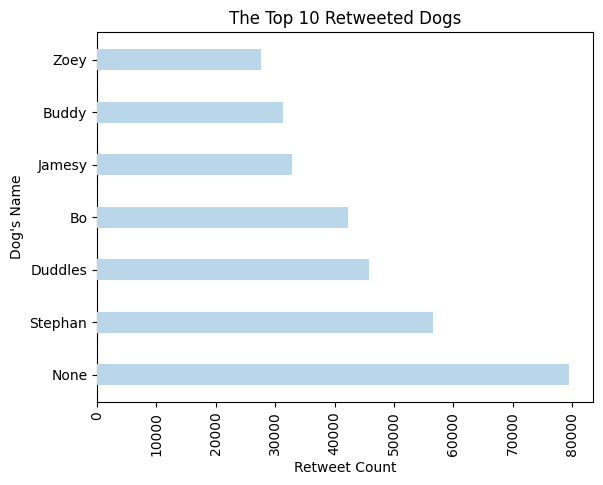

In [74]:
# Visualize most retweeted dogs
retweeted_dog = twitter_archive_master.nlargest(10, "Retweet_count")
plt.barh(retweeted_dog["Name"], retweeted_dog["Retweet_count"], 
         height = 0.4, color="#BAD7E9", zorder=3)
drawChart( "The Top 10 Retweeted Dogs", "Retweet Count", "Dog's Name", 90)

#### Insight 3
Unfortunately, there are about 80K of retweets of unnamed dogs. However, the most retweeted dogs' images are for Stphan. 

In [75]:
#But who is Stephan?
twitter_archive_master.loc[twitter_archive_master['Name'] == "Stephan"]

,Tweet_id,Timestamp,Source,Text,Expanded_urls,Rating_numerator,Rating_denominator,Name,doggo,floofer,pupper,puppo,stage,JPG_url,Img_num,Dog_breed,P1_conf,Retweet_count,Favorite_count
322,807106840509214720,2016-12-09 06:17:20,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,,,,,NaN,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.50537,56625,107015


In [76]:
#who is Duddles?
twitter_archive_master.loc[twitter_archive_master['Name'] == "Duddles"]

,Tweet_id,Timestamp,Source,Text,Expanded_urls,Rating_numerator,Rating_denominator,Name,doggo,floofer,pupper,puppo,stage,JPG_url,Img_num,Dog_breed,P1_conf,Retweet_count,Favorite_count
51,879415818425184262,2017-06-26 19:07:24,Twitter for iPhone,This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13,10,Duddles,,,,,NaN,https://pbs.twimg.com/ext_tw_video_thumb/87941...,1,English_springer,0.383404,45849,107956
